# Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set()

# Original Data

In [3]:
mimic = pd.read_csv("filtered_data.csv")
mimic.head()

,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,Metastasis,Peripheral Vascular Disease,Hypothyroidism,Chronic Heart Failure,Stroke,Liver Disease,SAPS II,SOFA,OASIS,Sepsis,Any Organ Failure,Severe Respiratory Failure,Severe Coagulation Failure,Severe Liver Failure,Severe Cardiovascular Failure,Severe Central Nervous System Failure,Severe Renal Failure,Respiratory Dysfunction,Cardiovascular Dysfunction,Renal Dysfunction,Hematologic Dysfunction,Metabolic Dysfunction,Neurologic Dysfunction,Max Heart Rate,Min Heart Rate,Mean Heart Rate,Max MAP,Min MAP,Mean MAP,Max Systolic Pressure,Min Systolic Pressure,Mean Systolic Pressure,Max Diastolic Pressure,Min Diastolic Pressure,Mean Diastolic Pressure,Max Temperature,Min Temperature,Mean Temperature,Max Lactate,Min Lactate,Mean Lactate,Max pH,Min pH,Mean pH,Max Glucose,Min Glucose,Mean Glucose,Max WBC,Min WBC,Mean WBC,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin
0,0,76,M,0,0,0,0,0,0,0,0,0,1,0,0,79,7,57,1,1,0,0,0,1,0,0,0,1,1,0,0,0,168.0,75.0,111.785714,259.0,40.0,75.692812,217.0,64.0,102.960000,74.0,28.0,55.720000,37.599998,36.200001,37.002881,8.8,2.1,4.87,7.59,7.26,7.36,299.0,91.0,224.90,24.4,11.3,17.26,53.0,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04
1,1,41,M,1,0,0,0,0,0,0,0,0,1,0,0,31,5,35,0,1,0,0,0,0,0,0,0,0,1,0,0,0,111.0,82.0,92.500000,132.0,67.0,98.850000,217.0,106.0,159.375000,107.0,53.0,79.525000,37.888887,35.500001,37.049383,2.7,1.9,2.33,7.43,7.39,7.41,178.0,129.0,153.75,13.7,7.5,10.60,17.0,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10
2,1,72,M,1,0,0,0,0,0,0,0,0,0,0,0,41,3,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.0,71.0,85.828571,110.0,73.0,88.200000,165.0,98.0,128.228571,79.0,55.0,64.885714,37.666668,35.500001,36.616162,15.1,2.0,9.63,7.35,7.02,7.20,191.0,88.0,168.00,8.4,7.8,8.10,39.0,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23
3,0,39,F,1,0,1,0,0,0,0,0,0,0,0,0,13,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124.0,60.0,83.600000,111.0,73.0,93.772727,151.0,102.0,126.136364,84.0,53.0,66.000000,37.400002,35.944443,36.653534,NaN,NaN,NaN,7.51,7.34,7.42,239.0,119.0,168.14,19.3,16.6,17.95,18.0,13.0,15.33,0.8,0.5,0.63,12.3,7.9,10.88
4,0,47,F,0,0,0,0,0,0,0,0,0,0,0,0,53,7,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0,74.0,84.900000,98.0,53.0,71.387097,138.0,50.0,101.222222,71.0,30.0,52.222222,36.999999,36.000002,36.537037,NaN,NaN,NaN,7.43,6.88,7.30,159.0,73.0,126.29,24.0,10.5,17.25,11.0,10.0,10.50,0.8,0.7,0.75,13.7,9.1,10.77


In [4]:
# check for datatype of each column
mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18883 entries, 0 to 18882
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hospital Mortality                     18883 non-null  int64  
 1   Age                                    18883 non-null  int64  
 2   Gender                                 18883 non-null  object 
 3   Uncomplicated Hypertension             18883 non-null  int64  
 4   Complicated Hypertension               18883 non-null  int64  
 5   Uncomplicated Diabetes                 18883 non-null  int64  
 6   Complicated Diabetes                   18883 non-null  int64  
 7   Malignancy                             18883 non-null  int64  
 8   Hematologic Disease                    18883 non-null  int64  
 9   Metastasis                             18883 non-null  int64  
 10  Peripheral Vascular Disease            18883 non-null  int64  
 11  Hy

**Datatypes are correct**

Gender is stored as object data type. Other variables are stored as numerical.

In [5]:
mimic.describe()

,Hospital Mortality,Age,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,Metastasis,Peripheral Vascular Disease,Hypothyroidism,Chronic Heart Failure,Stroke,Liver Disease,SAPS II,SOFA,OASIS,Sepsis,Any Organ Failure,Severe Respiratory Failure,Severe Coagulation Failure,Severe Liver Failure,Severe Cardiovascular Failure,Severe Central Nervous System Failure,Severe Renal Failure,Respiratory Dysfunction,Cardiovascular Dysfunction,Renal Dysfunction,Hematologic Dysfunction,Metabolic Dysfunction,Neurologic Dysfunction,Max Heart Rate,Min Heart Rate,Mean Heart Rate,Max MAP,Min MAP,Mean MAP,Max Systolic Pressure,Min Systolic Pressure,Mean Systolic Pressure,Max Diastolic Pressure,Min Diastolic Pressure,Mean Diastolic Pressure,Max Temperature,Min Temperature,Mean Temperature,Max Lactate,Min Lactate,Mean Lactate,Max pH,Min pH,Mean pH,Max Glucose,Min Glucose,Mean Glucose,Max WBC,Min WBC,Mean WBC,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin
count,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18883.000000,18842.000000,18842.000000,18842.000000,18841.000000,18841.000000,18841.000000,18823.000000,18823.000000,18823.000000,18822.000000,18822.000000,18822.000000,18196.000000,18196.000000,18196.000000,13782.000000,13782.000000,13782.000000,17710.000000,17710.000000,17710.000000,18808.000000,18808.000000,18808.000000,18654.000000,18654.000000,18654.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18788.000000,18792.000000,18792.000000,18792.000000
mean,0.159773,62.220516,0.463909,0.077583,0.206694,0.050786,0.106551,0.148970,0.043849,0.086798,0.083461,0.240163,0.056029,0.095218,37.991209,5.042260,35.411693,0.149341,0.507017,0.064608,0.005296,0.011651,0.121909,0.058200,0.048615,0.258434,0.135254,0.245671,0.107239,0.099190,0.089657,106.303158,71.287568,87.307203,108.466960,56.985751,78.042750,152.289274,87.817931,117.388176,82.910583,43.406864,60.140840,37.719663,36.026687,36.949484,3.414678,1.834647,2.569431,7.435479,7.297606,7.370085,189.334390,109.176156,145.980404,15.061097,10.949025,12.948948,24.745848,20.760752,22.712651,1.360863,1.122919,1.238290,12.397542,9.758317,10.952545
std,0.366405,16.267211,0.498709,0.267521,0.404945,0.219567,0.308550,0.356068,0.204764,0.281546,0.276586,0.427194,0.229984,0.293523,14.813308,3.286905,8.258749,0.356433,0.499964,0.245840,0.072581,0.107311,0.327189,0.234128,0.215068,0.437785,0.342004,0.430496,0.309425,0.298925,0.285698,20.204652,15.101888,14.954834,28.965809,13.493521,10.282794,24.061677,17.486210,15.610451,17.997940,10.789424,9.790386,0.826505,0.971659,0.701227,2.865615,1.462907,1.954506,0.071786,0.104431,0.068992,86.833283,37.483602,46.270973,10.262001,7.456914,8.551809,19.451511,16.870466,17.989490,1.334245,1.093559,1.200874,1.927305,2.217876,1.847817
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.350000,38.038462,29.000000,0.200000,17.428571,45.000000,0.300000,29.166667,25.000000,1.000000,14.500000,30.000000,15.000000,30.000000,0.400000,0.200000,0.380000,6.720000,6.370000,6.720000,38.000000,1.150000,21.330000,0.100000,0.100000,0.100000,2.000000,1.000000,1.600000,0.100000,0.100000,0.100000,4.600000,1.200000,4.000000
25%,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3

In [6]:
# dimensions of the dataset
mimic.shape

(18883, 68)

In [7]:
# all column names
mimic.columns

Index(['Hospital Mortality', 'Age', 'Gender', 'Uncomplicated Hypertension',
       'Complicated Hypertension', 'Uncomplicated Diabetes',
       'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
       'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
       'Chronic Heart Failure', 'Stroke', 'Liver Disease', 'SAPS II', 'SOFA',
       'OASIS', 'Sepsis', 'Any Organ Failure', 'Severe Respiratory Failure',
       'Severe Coagulation Failure', 'Severe Liver Failure',
       'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Pressure',
       '

## Missing Values

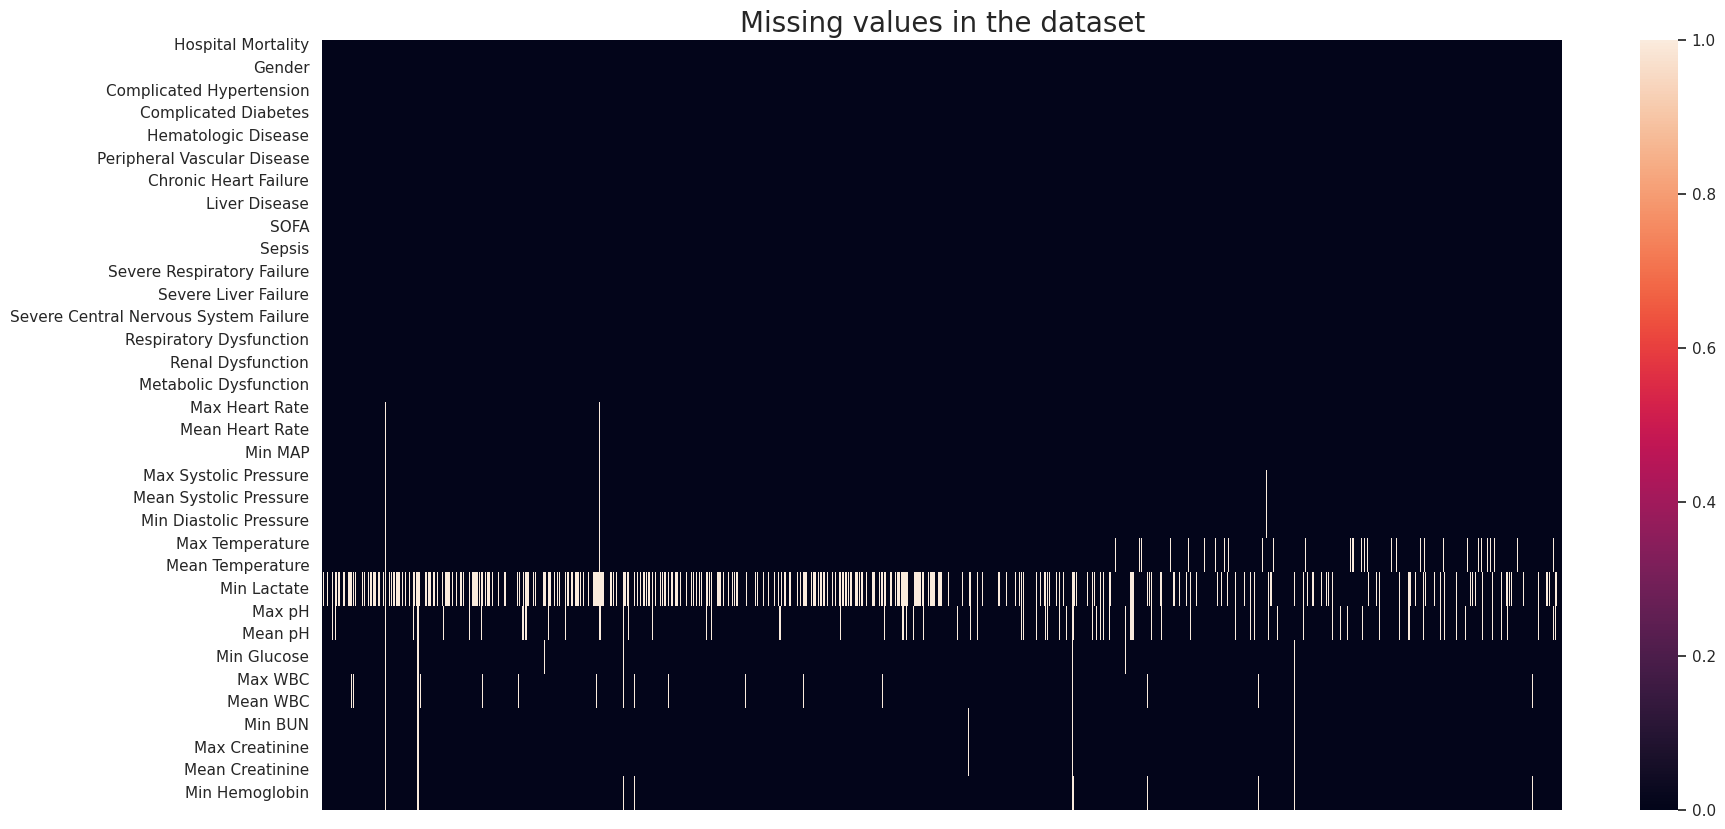

In [8]:
# visualize missing values column-wise
plt.figure(figsize = (20, 10))

mimic_t = mimic.transpose()

ax = sns.heatmap(mimic_t.isnull())
plt.title('Missing values in the dataset', fontsize = 20)
ax.set_xticks([])
plt.show()

In [9]:
# missing values column-wise
na_count = mimic.isnull().sum() # total count
na_pct = (na_count/len(mimic))*100 # percentage

na_df = pd.DataFrame({'Count': na_count.values,
                      'Percentage (%)': na_pct}).reset_index().rename(columns = {'index': 'Feature'})

na_df

,Feature,Count,Percentage (%)
0,Hospital Mortality,0,0.000000
1,Age,0,0.000000
2,Gender,0,0.000000
3,Uncomplicated Hypertension,0,0.000000
4,Complicated Hypertension,0,0.000000
5,Uncomplicated Diabetes,0,0.000000
6,Complicated Diabetes,0,0.000000
7,Malignancy,0,0.000000
8,Hematologic Disease,0,0.000000
9,Metastasis,0,0.000000


## Target Variable
The 2 classes in the target variable is imbalanced

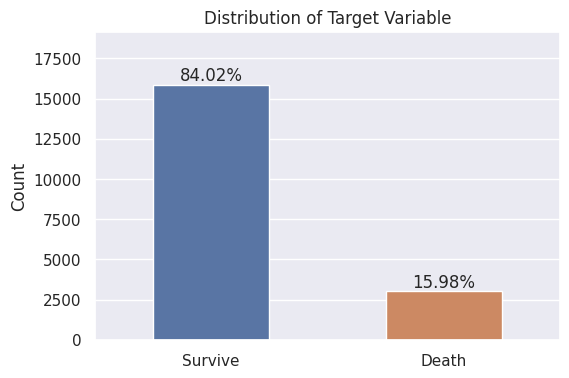

In [ ]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = mimic['Hospital Mortality'], width = 0.5)

total = len(mimic['Hospital Mortality'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom')

ax.set_title('Distribution of Target Variable')
ax.set_xticklabels(['Survive', 'Death'])
plt.xlabel('')
plt.ylabel('Count')
ax.set_ylim(top = ax.get_ylim()[1] * 1.15)

plt.show()